# Benchmarking OpenBLAS

13 de Febrero 2019

_Jorge III Altamirano Astorga - CU: 175904_

_Eduardo Selim Martinez Mayorga - CU: 175921_

_Ariel Ernesto Vallarino Maritorena - CU: 175875_


## OpenBLAS

Confirmamos que numpy esté ligado a una compilación de BLAS/MKL.

In [1]:
import numpy as np
np.__config__.show()

mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib

## Ejecución de Benchmark

In [2]:
#!/usr/bin/env python3
# -*- coding: UTF-8 -*-

# Basado en http://stackoverflow.com/questions/11443302/compiling-numpy-with-openblas-integration

import numpy as np
from time import time

print("==========================================================================")
print("Valores de la configuracion OpenBLAS")
np.__config__.show()
print("========================================================================\n")

# Establecer la semilla con fines de reproducibilidad
np.random.seed(0)

# Tamaño d ela matriz
size = 4096
# Declaracion de las matrices
A, B = np.random.random((size, size)), np.random.random((size, size))
C, D = np.random.random((size * 128,)), np.random.random((size * 128,))
E = np.random.random((int(size / 2), int(size / 4)))
F = np.random.random((int(size / 2), int(size / 2)))
#Producto punto
F = np.dot(F, F.T)
G = np.random.random((int(size / 2), int(size / 2)))

# Multiplicacion de matriz 20 veces (N) para sacar un promedio.
N = 20
t = time()
for i in range(N):
    np.dot(A, B)
delta = time() - t
print('Producto punto de 2 matrices %dx%d tomo %0.2f segundos en promedio. ' % (size, size, delta / N))
del A, B

# Multiplicacion de vectores 5000 Veces para sacar un promedio.
N = 5000
t = time()
for i in range(N):
    np.dot(C, D)
delta = time() - t
print('Producto punto de 2 vectores de longitud %d tomo %0.2f ms en promedio.' % (size * 128, 1e3 * delta / N))
del C, D

# SVD: promedio de 3.
N = 3
t = time()
for i in range(N):
    np.linalg.svd(E, full_matrices = False)
delta = time() - t
print("SVD de una matriz %dx%d tomo %0.2f segundos." % (size / 2, size / 4, delta / N))
del E

# Cholesky: promedio de 3.
N = 3
t = time()
for i in range(N):
    np.linalg.cholesky(F)
delta = time() - t
print("Descomposicion de una Cholesky de una matriz %dx%d tomo  %0.2f segundos." % (size / 2, size / 2, delta / N))

# Valores y vectores propios: promedio de 3.
t = time()
for i in range(N):
    np.linalg.eig(G)
delta = time() - t
print("Descompisicion de valores y vectores propios de una matriz %dx%d tomo %0.2f segundos." % (size / 2, size / 2, delta / N))



Valores de la configuracion OpenBLAS
mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library

## Comparación de Rendimiento

Estos archivos fueron generados ejecutando el script `comp.py`. El cual genera un CSV con los valores que utilizaremos para probar y comparar rendimientos.

### Intel MKL

In [38]:
import pandas as pd
import numpy as np

df = pd.read_csv("compare.mkl_rt.csv")
df.head()

,BLAS,Tamaño,Operación,Iteraciones,Tiempo
0,mkl_rt,16.0,Producto de Matrices,5,0.000003
1,mkl_rt,32.0,Producto de Matrices,5,0.000003
2,mkl_rt,64.0,Producto de Matrices,5,0.000004
3,mkl_rt,128.0,Producto de Matrices,5,0.000026
4,mkl_rt,256.0,Producto de Matrices,5,0.000140


### OpenBLAS

In [4]:
df_openblas = pd.read_csv("compare.openblas.csv")
df_openblas.head(3)

,BLAS,Tamaño,Operación,Iteraciones,Tiempo
0,openblas,64.0,Producto Punto de Matrices,5,0.000045
1,openblas,128.0,Producto Punto de Matrices,5,0.000107
2,openblas,256.0,Producto Punto de Matrices,5,0.000303


### Atlas

Aunque es marcado como f77blas significa que fue compilado con el compilador Fortran 77.

In [5]:
df_atlas = pd.read_csv("compare.f77blas.csv")
df_atlas.head(3)

,BLAS,Tamaño,Operación,Iteraciones,Tiempo
0,f77blas,64.0,Producto Punto de Matrices,5,0.000151
1,f77blas,128.0,Producto Punto de Matrices,5,0.000461
2,f77blas,256.0,Producto Punto de Matrices,5,0.003503


### Numpy 

Sin OpenBLAS

In [6]:
df_noblas = pd.read_csv("compare.noblas.csv")
df_noblas.head(3)

,BLAS,Tamaño,Operación,Iteraciones,Tiempo
0,noblas,64.0,Producto Punto de Matrices,5.0,0.000162
1,noblas,128.0,Producto Punto de Matrices,5.0,0.001409
2,noblas,256.0,Producto Punto de Matrices,5.0,0.011780


## Cupy + CuBLAS 

Con Nvidia CUDA

In [4]:
df_cupy = pd.read_csv("compare.cupy+cublas+10.200000.csv")
df_cupy.head(3)

,BLAS,Tamaño,Operación,Iteraciones,Tiempo
0,cupy+cublas+10.200000,16.0,Producto Punto de Matrices,5,0.000180
1,cupy+cublas+10.200000,32.0,Producto Punto de Matrices,5,0.000022
2,cupy+cublas+10.200000,64.0,Producto Punto de Matrices,5,0.000022


## Gráficas

In [13]:
df.Operación.unique()

array(['Producto de Matrices', 'Producto Punto de Matrices',
       'Producto Punto de 2 Vectores', 'SVD', 'Cholesky', 'Eigen'],
      dtype=object)

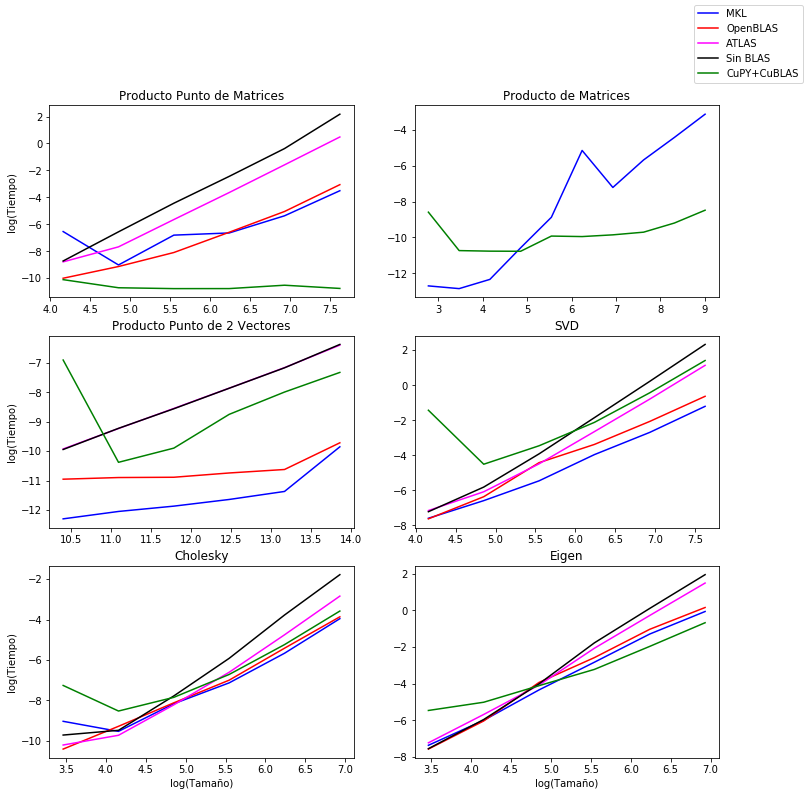

In [39]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, axs = plt.subplots(3, 2, sharex=False, sharey=False)
fig.set_size_inches(12, 12)
## Pruebas con MKL
df2 = df[df.Operación == 'Producto Punto de Matrices']
axs[0, 0].set_title(df2.iloc[0,2])
axs[0, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="blue", label="MKL")
df2 = df[df.Operación == 'Producto de Matrices']
axs[0, 1].set_title(df2.iloc[0,2])
axs[0, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="blue", label="MKL")
df2 = df[df.Operación == 'Producto Punto de 2 Vectores']
axs[1, 0].set_title(df2.iloc[0,2])
axs[1, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="blue", label="MKL")
df2 = df[df.Operación == 'SVD']
axs[1, 1].set_title(df2.iloc[0,2])
axs[1, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="blue", label="MKL")
df2 = df[df.Operación == 'Cholesky']
axs[2, 0].set_title(df2.iloc[0,2])
axs[2, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="blue", label="MKL")
df2 = df[df.Operación == 'Eigen']
axs[2, 1].set_title(df2.iloc[0,2])
axs[2, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="blue", label="MKL")
# Etiquetas
axs[0, 0].set_ylabel('log(Tiempo)')
axs[1, 0].set_ylabel('log(Tiempo)')
axs[2, 0].set_ylabel('log(Tiempo)')
axs[2, 0].set_xlabel('log(Tamaño)')
axs[2, 1].set_xlabel('log(Tamaño)')
# ## Pruebas con OpenBLAS
df_blas = pd.read_csv("compare.openblas.csv")
df2 = df_blas[df_blas.Operación == 'Producto Punto de Matrices']
axs[0, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="red", label="OpenBLAS")
df2 = df_blas[df_blas.Operación == 'Producto Punto de 2 Vectores']
axs[1, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="red", label="OpenBLAS")
df2 = df_blas[df_blas.Operación == 'SVD']
axs[1, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="red", label="OpenBLAS")
df2 = df_blas[df_blas.Operación == 'Cholesky']
axs[2, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="red", label="OpenBLAS")
df2 = df_blas[df_blas.Operación == 'Eigen']
axs[2, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="red", label="OpenBLAS")
# ## Pruebas con ATLAS
df_atlas = pd.read_csv("compare.f77blas.csv")
df2 = df_atlas[df_atlas.Operación == 'Producto Punto de Matrices']
axs[0, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="magenta", label="ATLAS")
df2 = df_atlas[df_atlas.Operación == 'Producto Punto de 2 Vectores']
axs[1, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="magenta", label="ATLAS")
df2 = df_atlas[df_atlas.Operación == 'SVD']
axs[1, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="magenta", label="ATLAS")
df2 = df_atlas[df_atlas.Operación == 'Cholesky']
axs[2, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="magenta", label="ATLAS")
df2 = df_atlas[df_atlas.Operación == 'Eigen']
axs[2, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="magenta", label="ATLAS")
# ## Pruebas sin OpenBLAS
df_noblas = pd.read_csv("compare.noblas.csv")
df2 = df_noblas[df_noblas.Operación == 'Producto Punto de Matrices']
axs[0, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="black", label="Sin BLAS")
df2 = df_noblas[df_noblas.Operación == 'Producto Punto de 2 Vectores']
axs[1, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="black", label="Sin BLAS")
df2 = df_noblas[df_noblas.Operación == 'SVD']
axs[1, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="black", label="Sin BLAS")
df2 = df_noblas[df_noblas.Operación == 'Cholesky']
axs[2, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="black", label="Sin BLAS")
df2 = df_noblas[df_noblas.Operación == 'Eigen']
axs[2, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="black", label="Sin BLAS")
## Pruebas CuBLAS
df_cupy = pd.read_csv("compare.cupy+cublas+10.200000.csv")
df2 = df_cupy[df_cupy.Operación == 'Producto Punto de Matrices']
axs[0, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="green", label="CuPY+CuBLAS")
df2 = df_cupy[df_cupy.Operación == 'Producto de Matrices']
axs[0, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="green", label="CuPY+CuBLAS")
df2 = df_cupy[df_cupy.Operación == 'Producto Punto de 2 Vectores']
axs[1, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="green", label="CuPY+CuBLAS")
df2 = df_cupy[df_cupy.Operación == 'SVD']
axs[1, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="green", label="CuPY+CuBLAS")
df2 = df_cupy[df_cupy.Operación == 'Cholesky']
axs[2, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="green", label="CuPY+CuBLAS")
df2 = df_cupy[df_cupy.Operación == 'Eigen']
axs[2, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="green", label="CuPY+CuBLAS")
fig.legend()
plt.savefig("plot.png")
plt.show()

## Conclusiones

En la gráfica anterior y haciendo comparaciones de distintos tamaños y operaciones encontramos que las distintas optimizaciones con librerías compiladas (Intel Math Kernel Language, OpenBLAS, NVIDIA cuBLAS, ATLAS y _a secas_) tienen distintos rendimientos computacionalmente hablando.

Se puede decir que las mejores generalmente son:
* Intel MKL
* OpenBLAS
* NVIDIA CuBLAS

Aunque es destacable que sin librerías es mucho más lento, ATLAS no obtiene unos rendimientos mejores a las dos mencionadas anteriormente.

Debido a restricciones de licenciamiento, no hemos distribuido en un Docker la librería MKL, por lo que pueden encontrarse las demás implementaciones que sirvieron para estas pruebas. Así mismo fue consistente en esta librería un comportamiento inconsistente en el benchmarking de Cholesky y Producto Punto de Matrices, donde las matrices de tamaño menor fueron tomaron más tiempo de ejecutarse.

### Notas generales sobre las pruebas

Esto se realizó en un equipo potente con las siguientes características en un ambiente controlado, no compartido, como es IaaS públicas:
* 64 GB de RAM
* Centos 7
* Xeon Gold Skylake con 16 cores en 2 sockets
* NVIDIA TESLA M10 - con 960 Cores
* Nota: los contenedores están compilados en Ubuntu 16.04

Las gráficas están en escala logarítmica para ambos ejes.

En el eje de las ordenadas un número menor, significa que es menor tiempo, siendo el mejor.

## Bibliografía y Referencias:

* [Building Numpy](https://www.numpy.org/devdocs/user/building.html#ubuntu)
* [Building ATLAS + Numpy](https://tillahoffmann.github.io/2016/06/01/compiling-numpy-with-ATLAS.html)
* [Fuentes de nuestros Dockers](https://github.com/philwebsurfer/analisis-numerico-computo-cientifico/tree/master/analisisnum-jorgealtamirano)
* [Docker Hub: OpenBLAS](https://hub.docker.com/r/philwebsurfer/openblas-py3)
* [Docker Hub: ATLAS](https://hub.docker.com/r/philwebsurfer/atlas-py3)
* [Docker Hub: noblas](https://hub.docker.com/r/philwebsurfer/noblas-py3)
* [Matplotlib subplots](https://matplotlib.org/gallery/recipes/create_subplots.html)
* [Matplotlib legends](https://matplotlib.org/users/legend_guide.html)
* [Matplotlib titles](https://matplotlib.org/gallery/text_labels_and_annotations/titles_demo.html#sphx-glr-gallery-text-labels-and-annotations-titles-demo-py)